# Plot by module

Make plots to understand the contribution of different modules to the final ice columns.

## Setep

Adjust the path to your `mixing.py` script and run the following cell. Access all functions in the mixing module with `mm.func()`.

In [1]:
path_to_model = '/home/cjtu/projects/essi21/essi21'
import os
os.chdir(path_to_model)
import mixing as mm
import numpy as np
import matplotlib.pyplot as plt

# Change seed for different results
random_seed = 0  # any integer workds
rng = mm.get_rng(random_seed)

# PLot labels
regimes = ('A', 'B', 'C', 'D', 'E')
labels = {
    'A': 'Micrometeorites',
    'B': 'Small impactors',
    'C': 'Simple craters (equil)',
    'D': 'Simple craters (stoch)',
    'E': 'Complex craters (stoch)',
}
fmts = {
    'A': 'rx',
    'B': 'b.',
    'C': 'y^',
    'D': 'm+',
    'E': 'c--',
}
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (8, 8),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
})

def ice_per_regime(time, regimes=regimes, rng=None):
    """Return ice from each regime at this time."""
    out = []
    for r in regimes:
        ice_mass = mm.total_impact_ice(time, [r], rng=rng) * mm.ICE_HOP_EFFICIENCY
        ice_thickness = mm.get_ice_thickness(ice_mass)
        out.append(ice_thickness)
    return out

## Generate ice columns

Set up all ice columns before loop, then loop and fill them. Should only need to run the following cell once, then can replot as many time as you'd like later.

In [2]:
%%time  

# ^%%time will automatically time this cell for you

# Loop through time_arr to get ice thicknesses you need
time_arr = mm._TIME_ARR

# Set up any array you want to compute here
ice_regA = np.zeros(len(time_arr))
ice_regB = np.zeros(len(time_arr))
ice_regC = np.zeros(len(time_arr))
ice_regD = np.zeros(len(time_arr))
ice_regE = np.zeros(len(time_arr))

for tidx, time in enumerate(time_arr):
    # Run your desired module function here with current time
    # Save to your array[tidx]
    # my_ice_col[tidx] = my_module(time)
    out = ice_per_regime(time, rng=rng)
    ice_regA[tidx] = out[0]
    ice_regB[tidx] = out[1]
    ice_regC[tidx] = out[2]
    ice_regD[tidx] = out[3]
    ice_regE[tidx] = out[4]

# If you want to show multiple runs together, enclose the above in another loop that sets different random seeds. Ex:
seeds = (mm.RANDOM_SEED, 19, 21, 7)

# Make list for multiple run outputs
ice_tot_all = []
for seed in seeds:
    # Set seed and init arrays
    rng = mm.get_rng(seed)
    ice_tot = np.zeros(len(time_arr))
    for tidx, time in enumerate(time_arr):
        out = ice_per_regime(time, rng=rng)
        ice_tot[tidx] = np.sum(out)
    # Don't forget to save to your per run list
    ice_tot_all.append(ice_tot)

CPU times: user 5.19 s, sys: 32.3 ms, total: 5.22 s
Wall time: 5.22 s


##  Plot 

Customize plots below. For the multi-run plots, you need to loop through the list of outputs you saved.

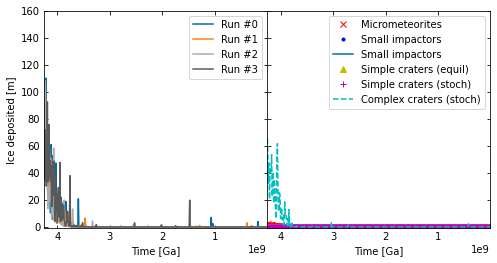

In [3]:
# I made subplots, but you can plot to a single one if you'd like
f, axs = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
f.subplots_adjust(wspace=0)

# Left subplot: multi-run totals
ax = axs[0]
time_arr_all = [time_arr] * len(ice_tot_all)
for i in range(len(ice_tot_all)):
    ax.plot(time_arr, ice_tot_all[i], label=f'Run #{i}')
ax.set_xlabel('Time [Ga]')
ax.set_ylabel('Ice deposited [m]')
ax.set_ylim(-1, 160)
ax.set_xlim(time_arr.max()+time_arr.min(), time_arr.min())
ax.legend()

# Right subplot: single run, ice per regime
ax = axs[1]
ax.plot(time_arr, ice_regA, fmts['A'], label=labels['A'])
ax.plot(time_arr, fmts['B'], ice_regB, label=labels['B'])
ax.plot(time_arr, ice_regC, fmts['C'], label=labels['C'])
ax.plot(time_arr, ice_regD, fmts['D'], label=labels['D'])
ax.plot(time_arr, ice_regE, fmts['E'], label=labels['E'])
ax.set_xlabel('Time [Ga]')
# ax.set_ylabel('Ice deposited [m]')
ax.set_ylim(-1, 160)
ax.set_xlim(time_arr.max()+time_arr.min(), time_arr.min())
ax.legend()
plt.show()